<a href="https://colab.research.google.com/github/vishalpanchamia/Reasoning-LLMs-from-Scratch/blob/main/Beam_Search_Demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install Dependencies

In [ ]:
!pip install transformers accelerate --quiet
!pip install networkx --quiet
import networkx as nx
import matplotlib.pyplot as plt
# Step 1: Install system package
!apt install graphviz graphviz-dev -y

# Step 2: Install Python bindings
!pip install pygraphviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.1 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42

### Load our reasoning model

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F

reasoning_model_id = "HuggingFaceH4/zephyr-7b-beta"

from transformers import AutoModelForCausalLM, AutoTokenizer

reasoning_tokenizer = AutoTokenizer.from_pretrained(reasoning_model_id, use_fast=True)
reasoning_model = AutoModelForCausalLM.from_pretrained(
    reasoning_model_id,
    torch_dtype=torch.float16,
    device_map="auto"
)
reasoning_model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not in

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096, padding_idx=2)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
        )
        (mlp): MistralMLP(
          (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): MistralRMSNorm((4096,), eps=1e-05)
      )
    )
    (norm): MistralRMSNorm((4

### Load the Process Reward Model

In [ ]:
# Load reward model (PRM approximation)
reward_model_id = "OpenAssistant/reward-model-deberta-v3-large"
reward_tokenizer = AutoTokenizer.from_pretrained(reward_model_id)
reward_model = AutoModelForSequenceClassification.from_pretrained(reward_model_id).to("cuda")
reward_model.eval()

tokenizer_config.json:   0%|          | 0.00/455 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/991 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

DebertaV2ForSequenceClassification(
  (deberta): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 1024, padding_idx=0)
      (LayerNorm): LayerNorm((1024,), eps=1e-07, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-23): 24 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (key_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (value_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (pos_dropout): Dropout(p=0.1, inplace=False)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNo

#### We are using an Output Reward Model to calculate the scores for steps. Hence, we need to write a piece of code which performs stepwise scoring

In [ ]:
# Simulate stepwise reward using a final-answer reward model
def stepwise_prm_score(prompt, trace, reward_model, tokenizer, device="cuda"):
    steps = trace.split(". ")
    cumulative_score = 0.0
    for i in range(1, len(steps)+1):
        partial = prompt + "\n" + ". ".join(steps[:i])
        inputs = tokenizer(partial, return_tensors="pt", truncation=True).to(device)
        with torch.no_grad():
            score = reward_model(**inputs).logits[0].item()
        cumulative_score += score
    return cumulative_score / len(steps) if steps else 0.0

####  Beam search execution. N is the total number of beams and M is the beam width.

In [ ]:
def beam_search_with_prm(prompt, reasoning_model, reasoning_tokenizer,
                         reward_model, reward_tokenizer,
                         N=4, M=2, max_steps=3):
    assert N % M == 0, "N must be divisible by M"
    device = reasoning_model.device

    def format_zephyr_prompt(user_prompt: str) -> str:
        return f"<|system|>\nYou are a helpful assistant.\n<|user|>\n{user_prompt}\n<|assistant|>\n"

    formatted_prompt = format_zephyr_prompt(prompt)

    graph = nx.DiGraph()
    node_counter = 0
    beams = []

    # Step 0: Initial N completions
    input_ids = reasoning_tokenizer(formatted_prompt, return_tensors="pt").input_ids.to(device)
    outputs = reasoning_model.generate(
        input_ids=input_ids,
        max_new_tokens=64,
        do_sample=False,
        num_beams=N,
        temperature=0.9,
        num_return_sequences=N,
        pad_token_id=reasoning_tokenizer.eos_token_id
    )

    for i in range(N):
        gen_text = reasoning_tokenizer.decode(outputs[i], skip_special_tokens=True)
        completion = gen_text.replace(formatted_prompt, "").strip()
        score = stepwise_prm_score(prompt, completion, reward_model, reward_tokenizer)
        node_id = f"0-{i}"
        graph.add_node(node_id, label=completion[:40]+"...", score=score)
        beams.append((gen_text, score, node_id))

    # Steps 1 to max_steps
    for step in range(1, max_steps + 1):
        beams = sorted(beams, key=lambda x: x[1], reverse=True)[:M]
        candidates = []

        for parent_text, _, parent_id in beams:
            input_ids = reasoning_tokenizer(parent_text, return_tensors="pt").input_ids.to(device)
            children = reasoning_model.generate(
                input_ids=input_ids,
                max_new_tokens=64,
                do_sample=False,
                num_beams=(N // M),
                num_return_sequences=(N // M),
                pad_token_id=reasoning_tokenizer.eos_token_id
            )

            for i in range(N // M):
                child_text = reasoning_tokenizer.decode(children[i], skip_special_tokens=True)
                continuation = child_text.replace(parent_text, "").strip()
                score = stepwise_prm_score(prompt, continuation, reward_model, reward_tokenizer)
                node_id = f"{step}-{i}-{parent_id}"
                graph.add_node(node_id, label=continuation[:40]+"...", score=score)
                graph.add_edge(parent_id, node_id)
                candidates.append((child_text, score, node_id))

        beams = sorted(candidates, key=lambda x: x[1], reverse=True)[:N]


    return beams, graph

### For visualizing the beam search tree

In [ ]:
def plot_trace_graph_tree_clean(graph, figsize=(14, 8), title="Beam Search Tree (PRM-Guided)"):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    import networkx as nx
    import textwrap

    try:
        pos = nx.nx_agraph.graphviz_layout(graph, prog='dot')
    except:
        pos = nx.spring_layout(graph, seed=42)

    scores = nx.get_node_attributes(graph, 'score')
    labels = nx.get_node_attributes(graph, 'label')
    node_colors = [scores[n] for n in graph.nodes()]
    node_order = list(graph.nodes())

    fig, ax = plt.subplots(figsize=figsize)

    # Draw edges
    nx.draw_networkx_edges(graph, pos, ax=ax, alpha=0.3)

    # Draw nodes with color based on PRM score (no edge color)
    for node in node_order:
        x, y = pos[node]
        score = scores.get(node, 0)
        fill_color = plt.cm.viridis((score - min(node_colors)) / (max(node_colors) - min(node_colors)))

        ax.scatter(x, y, s=800, c=[fill_color], edgecolors='black', linewidths=1, zorder=5)

        # Shortened label below node
        text = textwrap.shorten(labels.get(node, ""), width=50, placeholder="...")
        ax.text(x, y - 30, text, ha='center', va='top', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="black", lw=0.4), zorder=10)

    # Colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis,
                               norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
    sm.set_array(node_colors)
    fig.colorbar(sm, ax=ax, label="PRM Score")

    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


### Example usage

In [ ]:
prompt = "Roger has 5 tennis balls. He buys 2 cans of 3 tennis balls each. How many tennis balls does he have now?"
beams, graph = beam_search_with_prm(prompt, reasoning_model, reasoning_tokenizer, reward_model, reward_tokenizer, N=4, M=2, max_steps=3)

for i, (text, score, _) in enumerate(beams):
    print(f"--- Final Beam {i+1} ---\nScore: {score:.2f}\n{text}\n")

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


--- Final Beam 1 ---
Score: -0.01
<|system|>
You are a helpful assistant.
<|user|>
Roger has 5 tennis balls. He buys 2 cans of 3 tennis balls each. How many tennis balls does he have now?
<|assistant|>
Roger originally had 5 tennis balls. When he bought 2 cans, each containing 3 tennis balls, he received a total of 6 tennis balls from the cans (2 cans with 3 balls each). So, in total, Roger now has 5 tennis balls from before plus the 6 tennis balls from the cans, for a total of 11 tennis balls:

Original tennis balls: 5
Tennis balls from cans: 6
Total tennis balls: 11 (5 + 6)

So, Roger now has 11 tennis balls in total.

Alternatively, you could also calculate it by finding out how many tennis balls were in total before buying the cans (5) and then adding the number of tennis balls in the cans (6):

Total tennis balls before buying cans: 5
Tennis balls from cans:

--- Final Beam 2 ---
Score: -0.29
<|system|>
You are a helpful assistant.
<|user|>
Roger has 5 tennis balls. He buys 2 cans

### Beam Search Tree Visualization

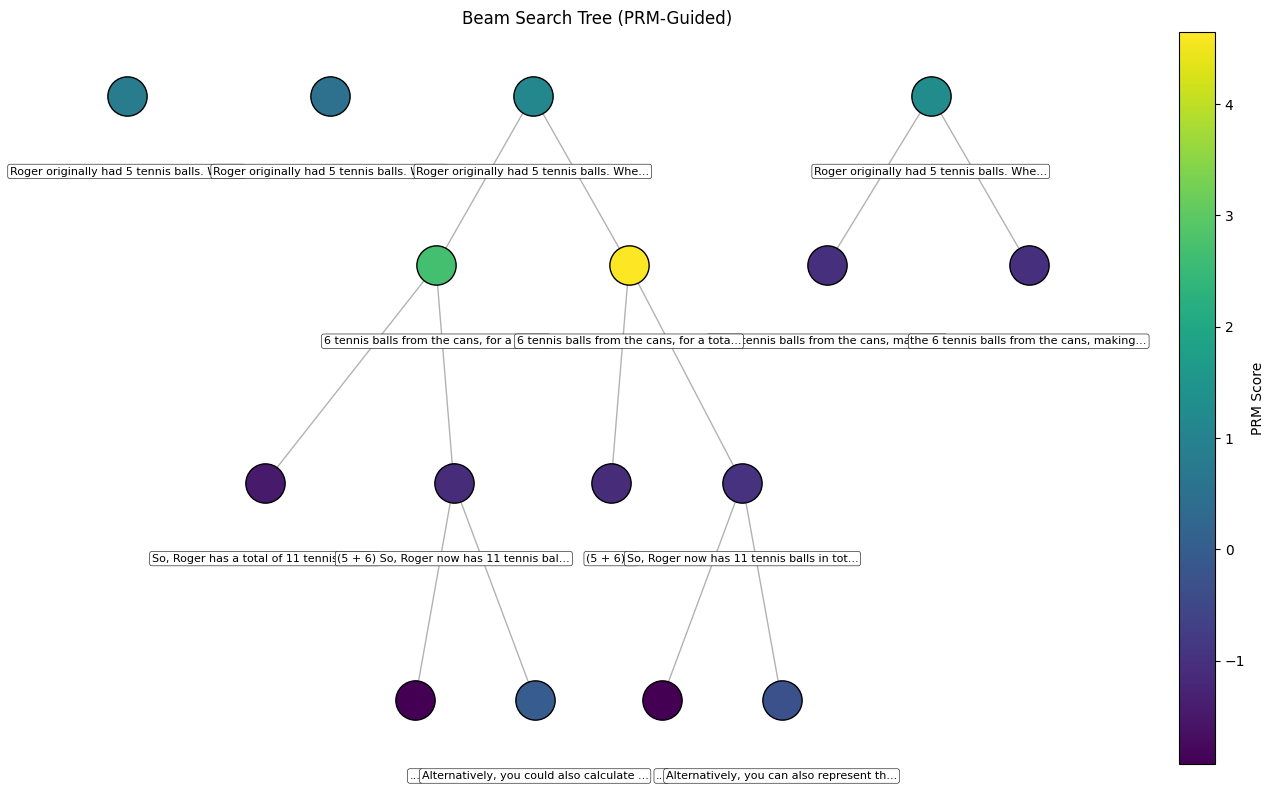

In [ ]:
plot_trace_graph_tree_clean(graph)

